# COVID-19 Tweet Sentiment Analysis — End-to-End Notebook

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mdmashrooofkalim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('train.csv', encoding='latin1')
df.head()
df.info()
df['Sentiment'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64

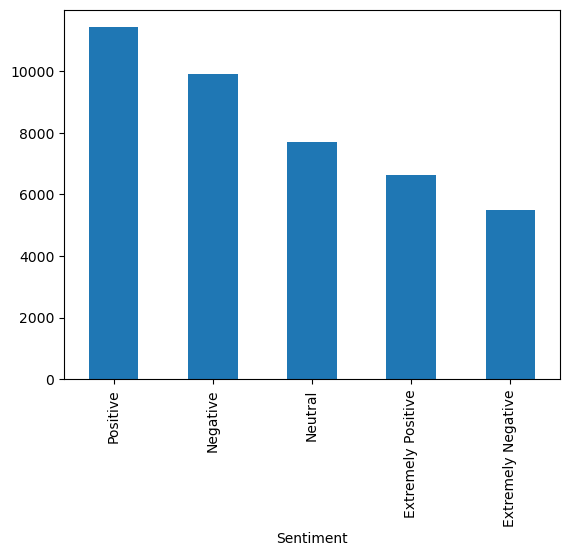

In [4]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.show()

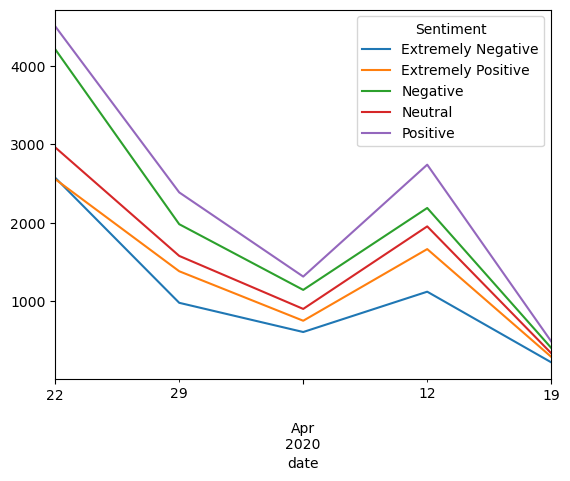

In [5]:
df['date'] = pd.to_datetime(df['TweetAt'], dayfirst=True, errors='coerce')
df.groupby(df['date'].dt.to_period('W'))['Sentiment'].value_counts().unstack().plot()
plt.show()

In [6]:
def clean_text(t):
    t = str(t).lower()
    t = re.sub(r'http\S+','', t)
    t = re.sub(r'@\w+','', t)
    t = re.sub(r'[^a-z0-9\s#]', '', t)
    t = re.sub(r'\s+',' ', t).strip()
    return t

df['clean'] = df['OriginalTweet'].apply(clean_text)

In [7]:
mapping = {
  'Extremely Negative':'Negative',
  'Negative':'Negative',
  'Neutral':'Neutral',
  'Positive':'Positive',
  'Extremely Positive':'Positive'
}
df['label'] = df['Sentiment'].map(mapping)


In [8]:
X_train, X_temp, y_train, y_temp = train_test_split(df['clean'], df['label'], test_size=0.3, stratify=df['label'], random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [9]:
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=20000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_dev_tfidf = tfidf.transform(X_dev)


In [10]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)
preds = clf.predict(X_dev_tfidf)
print(classification_report(y_dev, preds))

              precision    recall  f1-score   support

    Negative       0.76      0.78      0.77      2310
     Neutral       0.71      0.55      0.62      1157
    Positive       0.77      0.83      0.80      2707

    accuracy                           0.76      6174
   macro avg       0.75      0.72      0.73      6174
weighted avg       0.76      0.76      0.76      6174

